In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')                                       # Ignore/Do not display warnings

main_data = pd.read_csv('pima-indians-diabetes.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

sns.set(color_codes=False)                                              # Displays charts with background colors
%matplotlib inline

stats_colors = {'Mean':'#D50000', 'Mode':'#FF3D00', 'Median':'#2962FF'} # Set standard colors for mean, mode and median to use accross entire notebook

In [11]:
'''
Input:
Pandas DataFrame

Output:
Displays DataFrame structure 
(columns, nulls and non nulls counts and percentage highlighing columns with most number of nulls)

Retunrs:
N/A
'''
def info(dataFrame):
    nulls_series             = dataFrame.isna().sum()         # Get a series counting number of empty values for each column
    nonnulls_series          = dataFrame.notnull().sum()      # Get a series counting number of non empty valuesfor each column 
    nulls_percentage         = ((nulls_series * 100)/(nulls_series + nonnulls_series)).astype(float)
    column_datatypes         = dataFrame.dtypes               # Get a series containing data types for each column 

    nulls_count_df = pd.concat(
        [nulls_series, nonnulls_series, nulls_percentage, column_datatypes],
        axis=1,
        keys=["Nulls", "Non-Nulls","Nulls %", "Type"], 
        sort=True)
    cm = sns.light_palette("red", as_cmap=True)
    display(nulls_count_df.style.background_gradient(cmap=cm, subset=pd.IndexSlice[:, ['Nulls %']]).format(formatter={('Nulls %'): "{:.2f}%"}))

In [12]:
info(main_data)

,Nulls,Non-Nulls,Nulls %,Type
Plas,0,768,0.00%,int64
Preg,0,768,0.00%,int64
Pres,0,768,0.00%,int64
age,0,768,0.00%,int64
class,0,768,0.00%,int64
mass,0,768,0.00%,float64
pedi,0,768,0.00%,float64
skin,0,768,0.00%,int64
test,0,768,0.00%,int64


In [13]:
main_data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
'''
Input:
Axis, column name/x-axis, hue name

Output:
Displays a count plot.

Retunrs:
N/A
''' 
def HistBoxplot(box_chart_ax, hist_chart_ax, x_axis):
    sns.boxplot(
        data=main_data,
        x=main_data[x_axis],
        showmeans=True,
        ax=box_chart_ax)
    
    sns.histplot(
        data=main_data,
        x=main_data[x_axis],
        kde=True,
        ax=hist_chart_ax)
    
    hist_chart_ax.axvline(main_data[x_axis].mean(),                 # Get the mean of the values in the given column and draw a vertical line that cuts the chart on the mean value 
               color=stats_colors['Mean'],                                  # Use on of the colors predefined on this notebook
               label='Mean',                                                # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.axvline(main_data[x_axis].median(),               # Plot the median line on the chart.
               color=stats_colors['Median'],                                # Use on of the colors predefined on this notebook
               label='Median',                                              # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.axvline(main_data[x_axis].mode()[0],              # Plot the mode line on the chart.
               color=stats_colors['Mode'],                                  # Use on of the colors predefined on this notebook 
               label='Mode',                                                # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.legend(loc='upper right')
    
def PlotHistBoxGrid():
    col_names = main_data.select_dtypes(include=['float', 'int64']).columns.tolist()
    print(col_names)

    col_index = 0
    for r in range(0, int(len(col_names)), 3):
        fig, (box, hist) = plt.subplots(
            nrows=2,                                                                # Number of rows of the grid
            ncols=3,                                                                # Number of columns of the grid.
            figsize=(15,4),
            gridspec_kw={"height_ratios" : (0.25,0.5)},
            constrained_layout=True)

        for index in range(0, 3):
            if col_index < int(len(col_names)):
                HistBoxplot(box.flat[index], hist.flat[index], col_names[col_index])
            col_index += 1

['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']


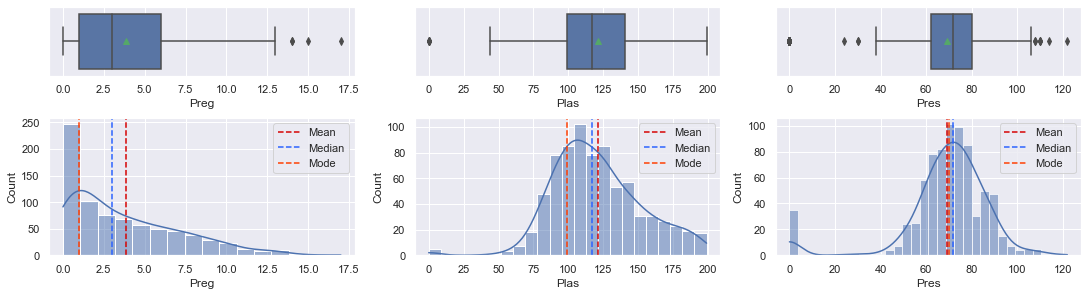

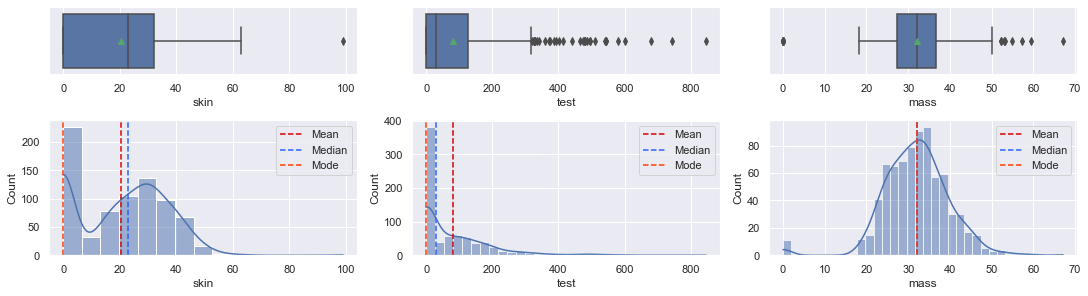

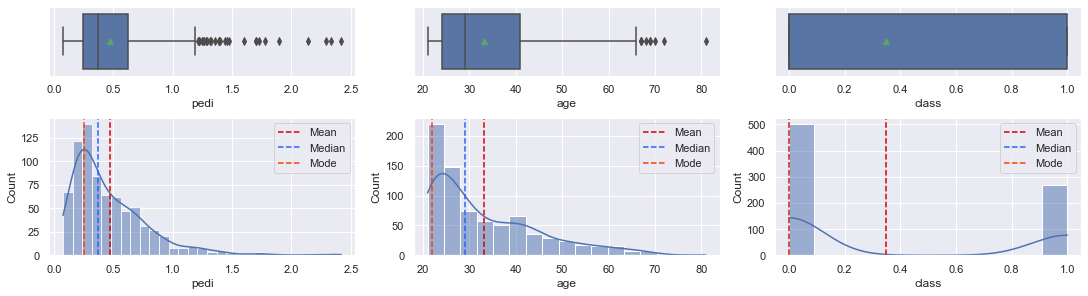

In [17]:
PlotHistBoxGrid()

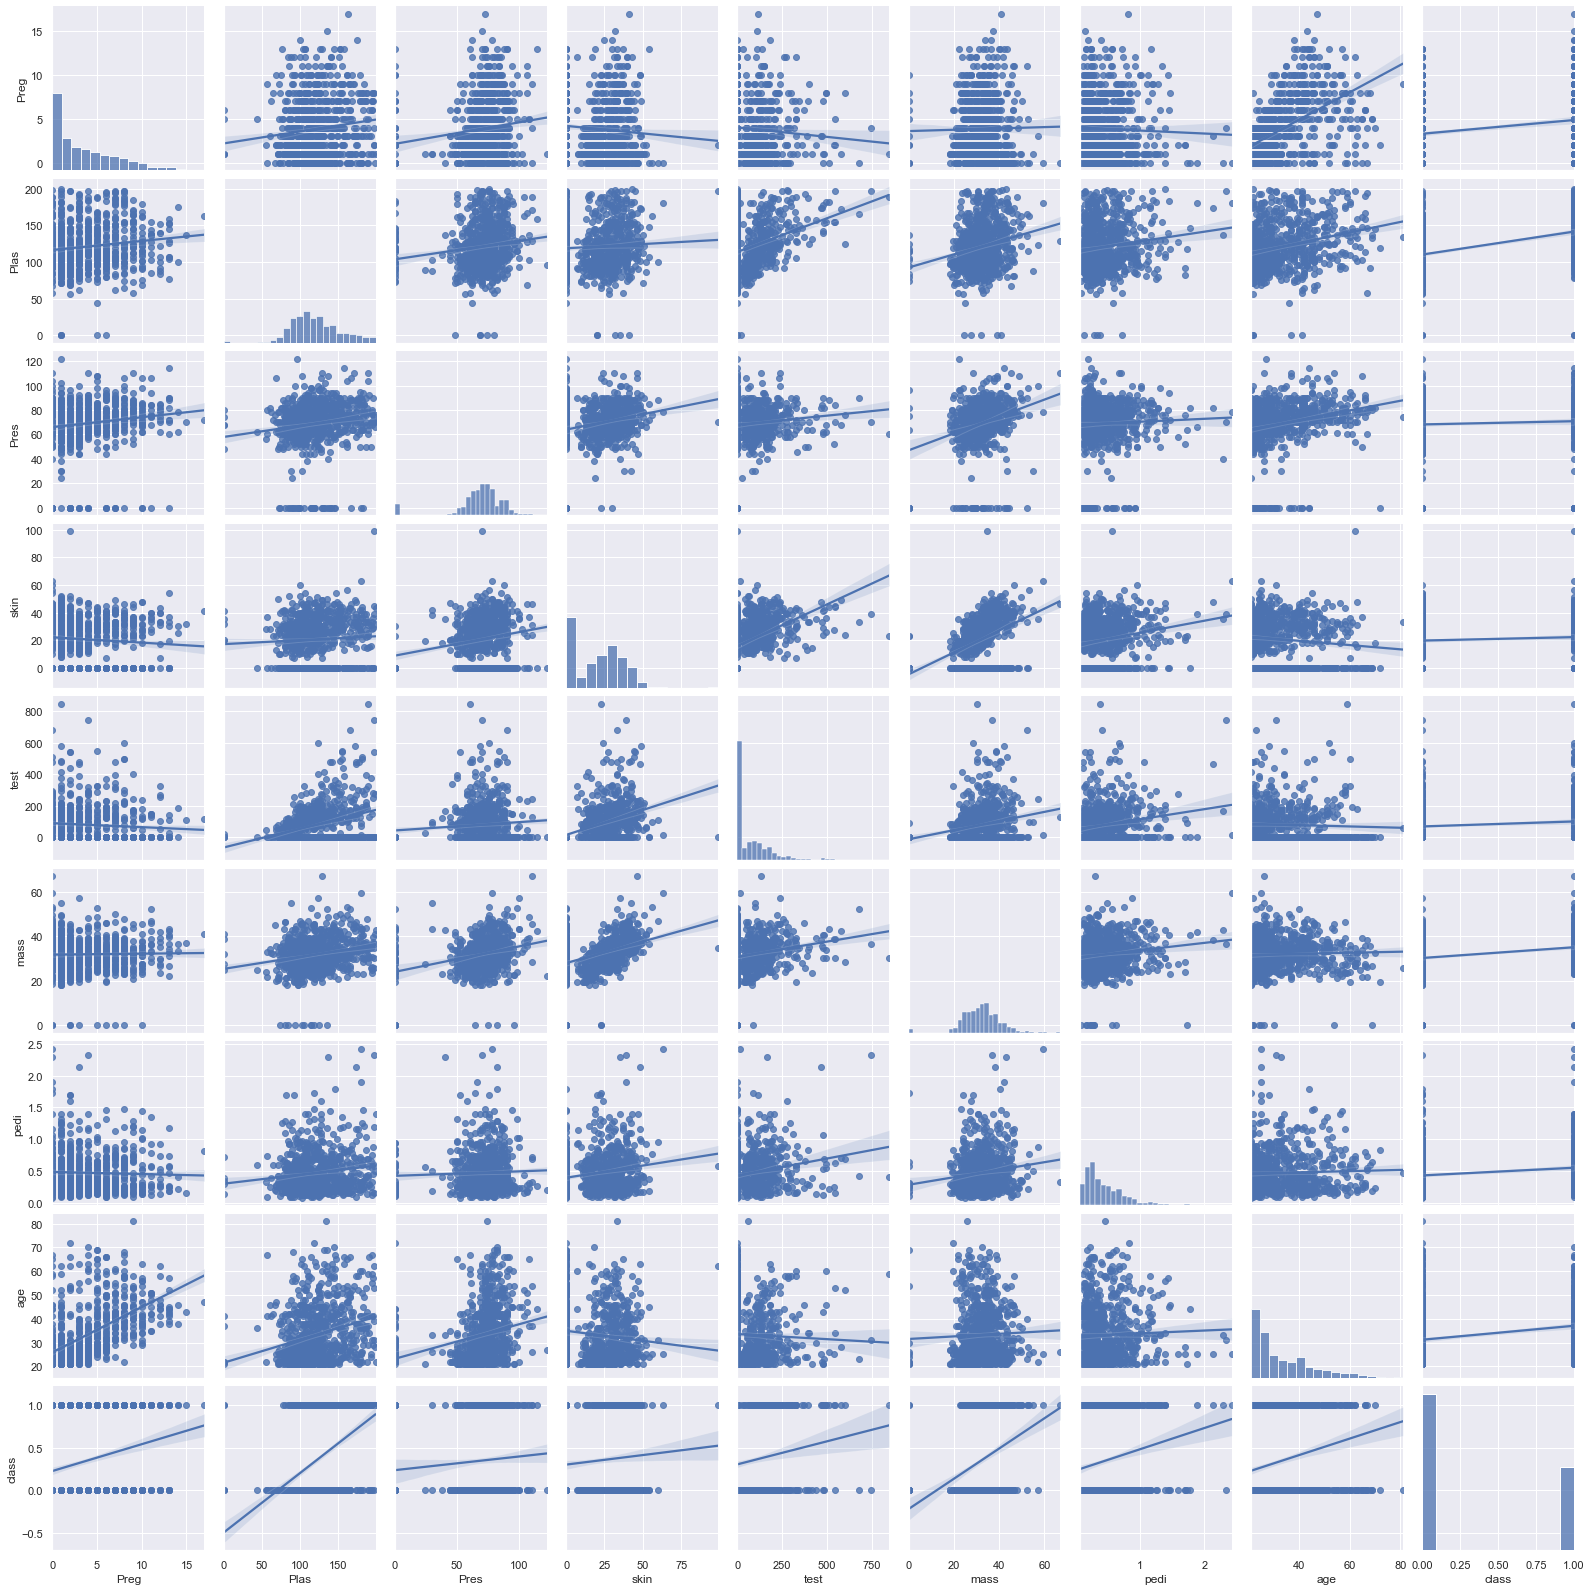

In [18]:
sns.pairplot(data=main_data, kind="reg")

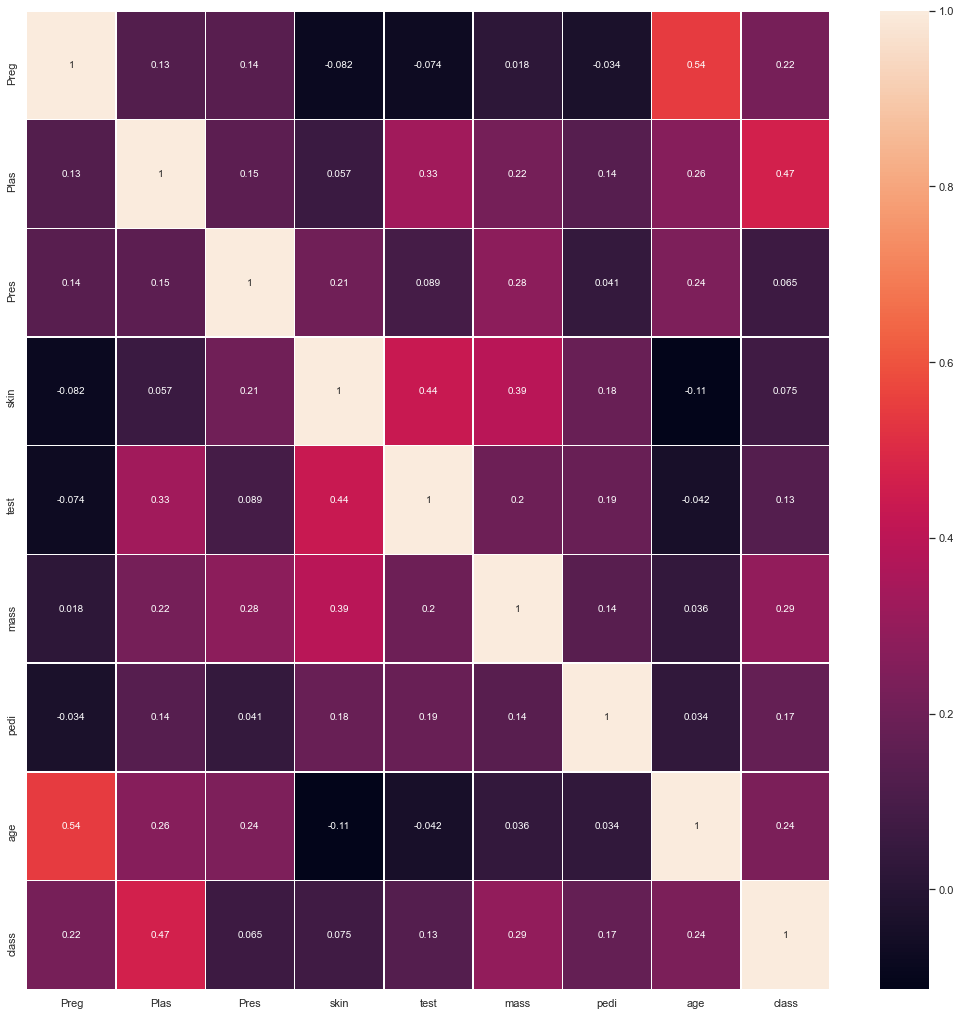

In [19]:
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(data=main_data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [54]:
def CountUniqueValues(col_name):
    print(f"Unique Values count for: '{col_name}'")
    for unique_col_value in  main_data[col_name].unique().tolist():
        total_count = main_data[col_name].count()
        unique_values_count = main_data[main_data[col_name] == unique_col_value][col_name].count()
        percentage = str(round((unique_values_count/total_count) * 100, 2))
        print(f"{unique_col_value}: {percentage}% of ({total_count})")

In [55]:
CountUniqueValues('class')

Unique Values count for: 'class'
1: 34.9% of (768)
0: 65.1% of (768)


In [57]:
col_names = main_data.select_dtypes(include=['float', 'int64']).columns.tolist()

In [62]:
from sklearn.model_selection import train_test_split
X = main_data.drop('class', axis=1)
Y = main_data['class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29
